In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import pathlib
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)


228827136/228813984 [==============================] - 78s 0us/step


In [3]:
print(data_dir)

C:\Users\souvi\.keras\datasets\flower_photos


In [5]:
roses = list(data_dir.glob('roses/*'))
print(roses[2])

C:\Users\souvi\.keras\datasets\flower_photos\roses\10503217854_e66a804309.jpg


In [9]:
import PIL

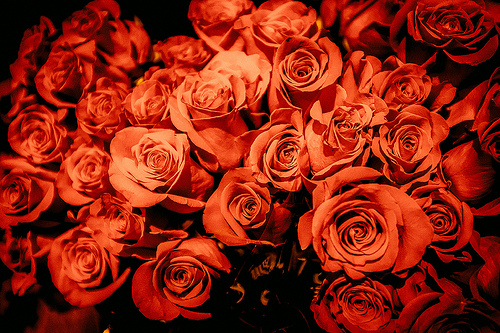

In [10]:
PIL.Image.open(roses[2])

Dataset Pre-Processing

In [12]:
img_height, img_width = 180,180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
validation_split=0.2,
subset ='training',
seed = 123,
label_mode = 'categorical',
image_size = (img_height,img_width),
batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
validation_split=0.2,
subset = 'validation',
seed = 123,
label_mode='categorical',
image_size = (img_height,img_width),
batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
class_name = train_ds.class_names

In [16]:
class_name

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [17]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
    classes=5)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(256,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))


94781440/94765736 [==============================] - 37s 0us/step


In [18]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 256)              131328    
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 5)                1285      
 pper)                                                  

In [19]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\Python\Python395\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
epochs = 20
history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
92/92 [==============================] - 49s 283ms/step - loss: 2.0920 - accuracy: 0.6914 - val_loss: 0.5986 - val_accuracy: 0.8106
Epoch 2/20
92/92 [==============================] - 14s 147ms/step - loss: 0.4147 - accuracy: 0.8597 - val_loss: 0.3637 - val_accuracy: 0.8665
Epoch 3/20
92/92 [==============================] - 14s 147ms/step - loss: 0.2403 - accuracy: 0.9169 - val_loss: 0.4168 - val_accuracy: 0.8678
Epoch 4/20
92/92 [==============================] - 14s 148ms/step - loss: 0.1809 - accuracy: 0.9353 - val_loss: 0.4431 - val_accuracy: 0.8542
Epoch 5/20
92/92 [==============================] - 14s 148ms/step - loss: 0.1203 - accuracy: 0.9598 - val_loss: 0.4591 - val_accuracy: 0.8692
Epoch 6/20
92/92 [==============================] - 14s 149ms/step - loss: 0.0840 - accuracy: 0.9731 - val_loss: 0.5183 - val_accuracy: 0.8515
Epoch 7/20
92/92 [==============================] - 14s 149ms/step - loss: 0.0732 - accuracy: 0.9700 - val_loss: 0.5119 - val_accuracy: 0.8583

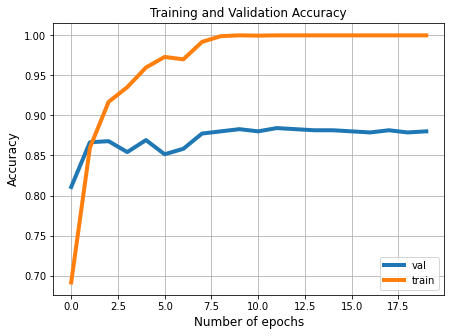

In [21]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

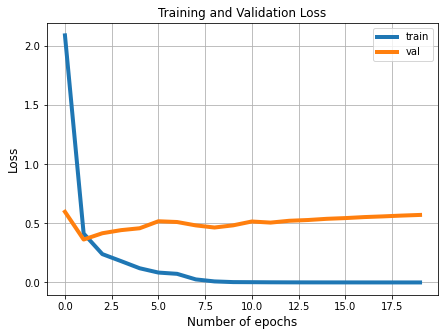

In [22]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [34]:
class_name

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [36]:
dandelions = list(data_dir.glob('dandelion/*'))
print(dandelions[2])

C:\Users\souvi\.keras\datasets\flower_photos\dandelion\10294487385_92a0676c7d_m.jpg


Predicted class is: dandelion


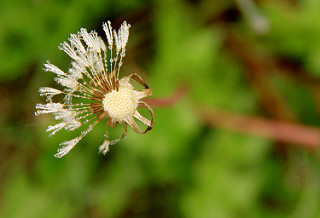

In [44]:
import cv2
img = cv2.imread(str(dandelions[1]))
img = cv2.resize(img,(180,180))
img = np.expand_dims(img,axis=0)
pred = resnet_model.predict(img)
print("Predicted class is:",class_name[np.argmax(pred)])
PIL.Image.open(str(dandelions[1]))
